In [1]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "snowflake-connector-python[pandas]"

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt 
import getpass
import seaborn as sns
%matplotlib inline 
import snowflake.connector 

C:\Users\Satish sahu\AppData\Local\Temp\ipykernel_9768\1546614347.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [5]:
conn = snowflake.connector.connect(
user  = 'SAHUG250',
password = getpass.getpass('your snowflake password:  '),
account = 'cvctewe-cf93003',
database = "RETAILS",
schema = 'PUBLIC',
warehouse = 'COMPUTE_WH')

your snowflake password:  ········


In [6]:
cur = conn.cursor()

In [7]:
SELECT_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
SELECT_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
SELECT_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
SELECT_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
SELECT_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
SELECT_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'


In [8]:
cur.execute(SELECT_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [9]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [10]:
cur.execute(SELECT_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [11]:
cur.execute(SELECT_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [12]:
cur.execute(SELECT_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [13]:
cur.execute(SELECT_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [14]:
cur.execute(SELECT_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [15]:
cur.close()
conn.close()

In [16]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0,0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0,0
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0,0
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0,0
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0,0


In [17]:
TRANSACTION_RAW.shape

(450416, 12)

In [18]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [19]:
PRODUCT_RAW.shape

(92353, 7)

In [20]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [21]:
CAMPAIGN_RAW.shape

(7208, 3)

In [22]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

## data modeling 

In [23]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [24]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [25]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [26]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [27]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [28]:
from datetime import datetime,timedelta

In [29]:
start_date = pd.to_datetime('2019-01-01')

In [30]:
start_date

Timestamp('2019-01-01 00:00:00')

In [31]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [32]:
TRANSACTION_RAW['DATE'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'], unit = 'D')

In [33]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02


In [34]:
CAMPAIGN_DESC_RAW['START_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'], unit = 'D')

In [35]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE
0,TypeB,24,659,719,2020-10-21
1,TypeC,15,547,708,2020-07-01
2,TypeB,25,659,691,2020-10-21
3,TypeC,20,615,685,2020-09-07
4,TypeB,23,646,684,2020-10-08


In [36]:
CAMPAIGN_DESC_RAW['END_DATE'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'], unit = 'D')

In [37]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE
0,TypeB,24,659,719,2020-10-21,2020-12-20
1,TypeC,15,547,708,2020-07-01,2020-12-09
2,TypeB,25,659,691,2020-10-21,2020-11-22
3,TypeC,20,615,685,2020-09-07,2020-11-16
4,TypeB,23,646,684,2020-10-08,2020-11-15


In [38]:
COUPON_REDEMPT_RAW['START_DATE'] = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'], unit = 'D')

In [39]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,START_DATE
0,1,421,10000085364,8,2020-02-26
1,1,421,51700010076,8,2020-02-26
2,1,427,54200000033,8,2020-03-03
3,1,597,10000085476,18,2020-08-20
4,1,597,54200029176,18,2020-08-20


In [40]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION            object
CAMPAIGN                 int8
START_DAY               int16
END_DAY                 int16
START_DATE     datetime64[ns]
END_DATE       datetime64[ns]
dtype: object

In [41]:
CAMPAIGN_DESC_RAW['durations_day'] = CAMPAIGN_DESC_RAW['END_DATE'] - CAMPAIGN_DESC_RAW['START_DATE']

In [42]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,durations_day
0,TypeB,24,659,719,2020-10-21,2020-12-20,60 days
1,TypeC,15,547,708,2020-07-01,2020-12-09,161 days
2,TypeB,25,659,691,2020-10-21,2020-11-22,32 days
3,TypeC,20,615,685,2020-09-07,2020-11-16,70 days
4,TypeB,23,646,684,2020-10-08,2020-11-15,38 days


In [43]:
CAMPAIGN_DESC_RAW['durations_day'] = CAMPAIGN_DESC_RAW['durations_day'].dt.days 

In [44]:
CAMPAIGN_DESC_RAW['durations_day'].mean()

46.6

In [45]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION              object
CAMPAIGN                   int8
START_DAY                 int16
END_DAY                   int16
START_DATE       datetime64[ns]
END_DATE         datetime64[ns]
durations_day             int64
dtype: object

<Axes: xlabel='CAMPAIGN', ylabel='durations_day'>

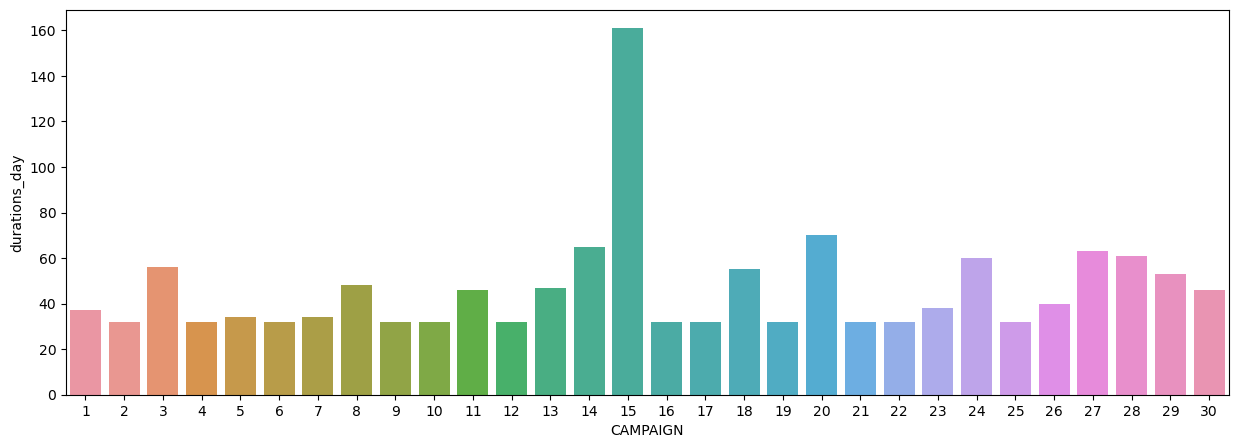

In [46]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'CAMPAIGN' , y = 'durations_day' , data = CAMPAIGN_DESC_RAW )

In [47]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN': 'count', 'durations_day': 'mean' })

,CAMPAIGN,durations_day
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


In [49]:
CAMPAIGN_DESC_RAW['START_MONTH'] = CAMPAIGN_DESC_RAW['START_DATE'].dt.strftime('%m')

In [50]:
CAMPAIGN_DESC_RAW['END_MONTH'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.strftime('%m')

In [51]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH
0,TypeB,24,659,719,2020-10-21,2020-12-20,60,10,12
1,TypeC,15,547,708,2020-07-01,2020-12-09,161,07,12
2,TypeB,25,659,691,2020-10-21,2020-11-22,32,10,11
3,TypeC,20,615,685,2020-09-07,2020-11-16,70,09,11
4,TypeB,23,646,684,2020-10-08,2020-11-15,38,10,11


In [52]:
CAMPAIGN_DESC_RAW['END_YEAR'] = CAMPAIGN_DESC_RAW['END_DATE'].dt.strftime('%Y')

In [53]:
CAMPAIGN_DESC_RAW['START_YEAR'] = CAMPAIGN_DESC_RAW['START_DATE'].dt.strftime('%Y')

In [54]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR
0,TypeB,24,659,719,2020-10-21,2020-12-20,60,10,12,2020,2020
1,TypeC,15,547,708,2020-07-01,2020-12-09,161,07,12,2020,2020
2,TypeB,25,659,691,2020-10-21,2020-11-22,32,10,11,2020,2020
3,TypeC,20,615,685,2020-09-07,2020-11-16,70,09,11,2020,2020
4,TypeB,23,646,684,2020-10-08,2020-11-15,38,10,11,2020,2020


In [55]:
COUPON_GIVEN = COUPON_RAW.groupby('CAMPAIGN').aggregate(Total_product = ('PRODUCT_ID', 'nunique'),
Total_coupon_given = ('COUPON_UPC', 'nunique'))

In [56]:
COUPON_RAW.dtypes

COUPON_UPC    int64
PRODUCT_ID    int32
CAMPAIGN       int8
dtype: object

In [57]:
COUPON_GIVEN = COUPON_GIVEN.merge(right = CAMPAIGN_DESC_RAW , on ='CAMPAIGN', how = 'left' )

In [58]:
COUPON_GIVEN.head()

,CAMPAIGN,Total_product,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR
0,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,01,2020,2019
1,2,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,01,2020,2019
2,3,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,02,2020,2019
3,4,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,02,2020,2020
4,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,02,2020,2020


In [60]:
COUPON_GIVEN.loc[:, ('CAMPAIGN', 'Total_product','Total_coupon_given' ,'START_MONTH' , 'END_MONTH', 'DESCRIPTION', 'durations_day', 'START_YEAR', 'END_YEAR')].sort_values(
by = 'Total_product', ascending = False).head(10)

,CAMPAIGN,Total_product,Total_coupon_given,START_MONTH,END_MONTH,DESCRIPTION,durations_day,START_YEAR,END_YEAR
12,13,35616,207,05,07,TypeA,47,2020,2020
17,18,35513,209,08,10,TypeA,55,2020,2020
7,8,17178,209,02,04,TypeA,48,2020,2020
25,26,3396,181,08,09,TypeA,40,2019,2019
29,30,3205,181,11,01,TypeA,46,2019,2020
21,22,1917,21,09,10,TypeB,32,2020,2020
23,24,1887,2,10,12,TypeB,60,2020,2020
15,16,1025,13,07,08,TypeB,32,2020,2020
24,25,826,17,10,11,TypeB,32,2020,2020
8,9,825,18,03,04,TypeB,32,2020,2020


In [61]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [62]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [63]:
COUPON_PRODUCT = COUPON_RAW.merge(right = PRODUCT_RAW , on ='PRODUCT_ID', how = 'left' )

In [64]:
COUPON_PRODUCT.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [65]:
COUPON_PRODUCT.isnull().sum()

COUPON_UPC              0
PRODUCT_ID              0
CAMPAIGN                0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [66]:
 COUPON_REDDEM = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedem = ('COUPON_UPC', 'nunique'))

In [67]:
COUPON_REDDEM

,total_coupon_reedem
CAMPAIGN,
1,1
2,4
3,2
4,6
5,5
6,1
7,5
8,105
9,14


In [68]:
COUPON_redeem = COUPON_REDDEM.merge(right = COUPON_GIVEN , on ='CAMPAIGN', how = 'left' )

In [69]:
COUPON_redeem.head()

,CAMPAIGN,total_coupon_reedem,Total_product,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR
0,1,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,01,2020,2019
1,2,4,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,01,2020,2019
2,3,2,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,02,2020,2019
3,4,6,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,02,2020,2020
4,5,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,02,2020,2020


In [70]:
COUPON_redeem['COUPON_REEDEM_RATE']= (COUPON_redeem['total_coupon_reedem']/COUPON_redeem['Total_coupon_given']*100)

In [71]:
COUPON_redeem['COUPON_REEDEM_RATE'].head()

0     9.090909
1    25.000000
2     5.882353
3    50.000000
4    45.454545
Name: COUPON_REEDEM_RATE, dtype: float64

In [72]:
COUPON_redeem.head()

,CAMPAIGN,total_coupon_reedem,Total_product,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR,COUPON_REEDEM_RATE
0,1,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,01,2020,2019,9.090909
1,2,4,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,01,2020,2019,25.000000
2,3,2,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,02,2020,2019,5.882353
3,4,6,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,02,2020,2020,50.000000
4,5,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,02,2020,2020,45.454545


In [73]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02


In [74]:
trxn_bucket = TRANSACTION_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE': 'sum','COUPON_DISC': 'sum', 'COUPON_MATCH_DISC':'sum'  })

In [75]:
trxn_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [76]:
trxn_bucket['use_coupon'] = trxn_bucket['COUPON_DISC']!=0 

In [77]:
trxn_bucket['use_coupon'].value_counts()

False    47892
True      2587
Name: use_coupon, dtype: int64

In [78]:
trxn_desc = TRANSACTION_RAW.merge(right = trxn_bucket , on = 'BASKET_ID', how = 'left')

In [79]:
trxn_desc = trxn_desc.merge(right = PRODUCT_RAW , on = 'PRODUCT_ID', how = 'left')

In [80]:
trxn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [81]:
trxn_desc.drop(['SALES_VALUE_y','COUPON_DISC_y', 'COUPON_MATCH_DISC_y'], axis = 1 , inplace = True)

In [82]:
trxn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,DATE,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [83]:
comodity_coupon = trxn_desc.groupby('COMMODITY_DESC').aggregate(total_quantity = ('QUANTITY', 'count'),
                                                                 use_coupon = ('use_coupon', 'sum'),
                                                                 Coupon = ('COUPON_DISC_x' , 'sum'))

In [84]:
comodity_coupon

,total_quantity,use_coupon,Coupon
COMMODITY_DESC,,,
,1303,872,-1396
(CORP USE ONLY),12,0,0
ADULT INCONTINENCE,74,3,-1
AIR CARE,928,193,-124
ANALGESICS,681,89,-3
...,...,...,...
WAREHOUSE SNACKS,1846,213,-18
WATCHES/CALCULATORS/LOBBY,12,0,0
WATER,363,36,0


In [85]:
comodity_coupon['coupon%'] = round((comodity_coupon['use_coupon']/ comodity_coupon ['total_quantity']) * 100 , 2)

In [86]:
comodity_coupon.sort_values('coupon%' , ascending = False).head(30)

,total_quantity,use_coupon,Coupon,coupon%
COMMODITY_DESC,,,,
NATURAL VITAMINS,1,1,-5,100.00
,1303,872,-1396,66.92
VALENTINE,5,2,0,40.00
BABY FOODS,3664,1114,-38,30.40
RW FRESH PROCESSED MEAT,7,2,0,28.57
DIAPERS & DISPOSABLES,864,231,-215,26.74
BABY HBC,817,181,-82,22.15
AIR CARE,928,193,-124,20.80
FRZN BREAKFAST FOODS,1743,347,-61,19.91


In [87]:
comodity_coupon

,total_quantity,use_coupon,Coupon,coupon%
COMMODITY_DESC,,,,
,1303,872,-1396,66.92
(CORP USE ONLY),12,0,0,0.00
ADULT INCONTINENCE,74,3,-1,4.05
AIR CARE,928,193,-124,20.80
ANALGESICS,681,89,-3,13.07
...,...,...,...,...
WAREHOUSE SNACKS,1846,213,-18,11.54
WATCHES/CALCULATORS/LOBBY,12,0,0,0.00
WATER,363,36,0,9.92


In [88]:
TRANSACTION_RAW

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,0,0,2019-06-26
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,0,0,2019-06-26
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,0,0,2019-06-26
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,0,0,2019-06-26


In [89]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY', 'WEEK_NO',  'DAY']).aggregate({'SALES_VALUE': 'sum', 'RETAIL_DISC':'sum' , 'COUPON_DISC': 'sum', 'COUPON_MATCH_DISC':'sum' })

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          21      145        50.23        -2.02           -3   
              22      150        55.03        -2.17            0   
              26      174       110.30       -49.05           -1   
                      175        10.59         0.00           -2   
                      176        20.26        -2.51            0   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          21      145                  0  
              22      150                  0  
              26      174                  0  
                      175                  0  
                      176                  0  

[40506 rows x 4 columns]

In [90]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['DATE'].dt.year).aggregate({'SALES_VALUE': 'sum', 'RETAIL_DISC':'sum' , 'COUPON_DISC': 'sum' })

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
DATE,,,
2019,1359551.73,-248978.11,-6693


In [ ]:
SELECT_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGNSELECT_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
SELECT_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
SELECT_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
SELECT_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
SELECT_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
SELECT_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'

In [91]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR
0,TypeB,24,659,719,2020-10-21,2020-12-20,60,10,12,2020,2020
1,TypeC,15,547,708,2020-07-01,2020-12-09,161,07,12,2020,2020
2,TypeB,25,659,691,2020-10-21,2020-11-22,32,10,11,2020,2020
3,TypeC,20,615,685,2020-09-07,2020-11-16,70,09,11,2020,2020
4,TypeB,23,646,684,2020-10-08,2020-11-15,38,10,11,2020,2020


In [92]:
CAMPAIGN_DESC_RAW.drop(['START_DAY', 'END_DAY'], axis= 1, inplace= True)

In [93]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR
0,TypeB,24,2020-10-21,2020-12-20,60,10,12,2020,2020
1,TypeC,15,2020-07-01,2020-12-09,161,07,12,2020,2020
2,TypeB,25,2020-10-21,2020-11-22,32,10,11,2020,2020
3,TypeC,20,2020-09-07,2020-11-16,70,09,11,2020,2020
4,TypeB,23,2020-10-08,2020-11-15,38,10,11,2020,2020


In [94]:
CAMPAIGN_DESC_RAW['START_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['START_DATE']).apply(lambda x: x.date())

In [95]:
type(CAMPAIGN_DESC_RAW['START_DATE'])

pandas.core.series.Series

In [96]:
CAMPAIGN_DESC_RAW['START_DATE']


0     2020-10-21
1     2020-07-01
2     2020-10-21
3     2020-09-07
4     2020-10-08
5     2020-09-16
6     2020-09-16
7     2020-08-10
8     2020-08-26
9     2020-07-29
10    2020-06-15
11    2020-07-15
12    2020-05-19
13    2020-04-22
14    2020-04-22
15    2020-04-08
16    2020-03-11
17    2020-02-17
18    2020-02-03
19    2020-01-29
20    2019-12-23
21    2020-01-13
22    2020-01-08
23    2019-12-13
24    2019-12-18
25    2019-11-20
26    2019-10-09
27    2019-09-17
28    2019-08-26
29    2019-08-13
Name: START_DATE, dtype: object

In [97]:
CAMPAIGN_DESC_RAW['END_DATE'] = pd.to_datetime(CAMPAIGN_DESC_RAW['END_DATE']).apply(lambda x: x.date())

In [98]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,START_DATE
0,1,421,10000085364,8,2020-02-26
1,1,421,51700010076,8,2020-02-26
2,1,427,54200000033,8,2020-03-03
3,1,597,10000085476,18,2020-08-20
4,1,597,54200029176,18,2020-08-20


In [99]:
COUPON_REDEMPT_RAW.drop(['DAY'] , axis = 1, inplace = True )

In [100]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,START_DATE
0,1,10000085364,8,2020-02-26
1,1,51700010076,8,2020-02-26
2,1,54200000033,8,2020-03-03
3,1,10000085476,18,2020-08-20
4,1,54200029176,18,2020-08-20


In [101]:
COUPON_REDEMPT_RAW['START_DATE'] = pd.to_datetime(COUPON_REDEMPT_RAW['START_DATE']).apply(lambda x: x.date())

In [102]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
START_DATE       object
dtype: object

In [103]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02


In [104]:
TRANSACTION_RAW.drop(['DAY', 'WEEK_NO'], axis = 1, inplace = True)

In [105]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
DATE                 datetime64[ns]
dtype: object

In [106]:
TRANSACTION_RAW['DATE'] = pd.to_datetime(TRANSACTION_RAW['DATE']).apply(lambda x: x.date())

In [107]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
DATE                  object
dtype: object

In [108]:
from  sqlalchemy import create_engine
from sqlalchemy.engine import url 
import snowflake.connector as snowCtx 
from snowflake.connector.pandas_tools import write_pandas 
import pandas as pd 
import getpass

In [109]:
conn = snowflake.connector.connect(
user  = 'SAHUG250',
password = getpass.getpass('your snowflake password:  '),
account = 'cvctewe-cf93003',
database = "RETAILS",
schema = 'PUBLIC',
warehouse = 'COMPUTE_WH')

your snowflake password:  ········


In [116]:
cur = conn.cursor()

In [122]:
COUPON_REDEMPT_RAW

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,START_DATE
0,1,10000085364,8,2020-02-26
1,1,51700010076,8,2020-02-26
2,1,54200000033,8,2020-03-03
3,1,10000085476,18,2020-08-20
4,1,54200029176,18,2020-08-20
...,...,...,...,...
2313,2496,54900050076,18,2020-08-15
2314,2496,55100000013,18,2020-09-02
2315,2500,53663200076,8,2020-03-25
2316,2500,54300031076,8,2020-03-25


In [123]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
START_DATE Date
)''')

In [124]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,2375,26984851472,1004906,1,1.39,364,-0.60,1631,0,0,2019-01-02
1,2375,26984851472,1033142,1,0.82,364,0.00,1631,0,0,2019-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.30,1631,0,0,2019-01-02
3,2375,26984851472,1082185,1,1.21,364,0.00,1631,0,0,2019-01-02
4,2375,26984851472,8160430,1,1.50,364,-0.39,1631,0,0,2019-01-02


In [118]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [119]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date  date,
durations_day NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
End_Year INT,
Start_Year INT)''')

In [120]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DATE,END_DATE,durations_day,START_MONTH,END_MONTH,END_YEAR,START_YEAR
0,TypeB,24,2020-10-21,2020-12-20,60,10,12,2020,2020
1,TypeC,15,2020-07-01,2020-12-09,161,07,12,2020,2020
2,TypeB,25,2020-10-21,2020-11-22,32,10,11,2020,2020
3,TypeC,20,2020-09-07,2020-11-16,70,09,11,2020,2020
4,TypeB,23,2020-10-08,2020-11-15,38,10,11,2020,2020


In [121]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [125]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [126]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416


In [127]:
cur.close()
conn.close()